# ML: NonLinear Regression - Polynomial
Non Linear Regression (Polynomial) regression is a method that extends linear regression to model non-linear relationships between variables. It's used when the distribution of data is not linear, and can be an important tool in machine learning.

## Key points about *polynomial* non-linear regression:
- **Degree**: The degree of the polynomial represents the highest power of the independent variable in the equation. For example, a polynomial with a degree of 2 is called a quadratic model, and a polynomial with a degree of 3 is called a cubic model.
- **Outlier sensitivity**: Before applying polynomial regression, you should preprocess and clean the data to handle missing values, outliers, and scale features. Polynomial regression is sensitive to outliers, and one or two outliers can significantly affect the results.
- **Equation**: The basic equation for single variate linear regression is typically written as: 
 `y = m1x + m2x^2 + b`, where
  - `m1` is the slope of the line1
  - `m2` is the slope of the line2
  - `b` is the intercept
- **Examples**
  - Predicting salary based on experience
  - Predicting heart rate based on age of a person

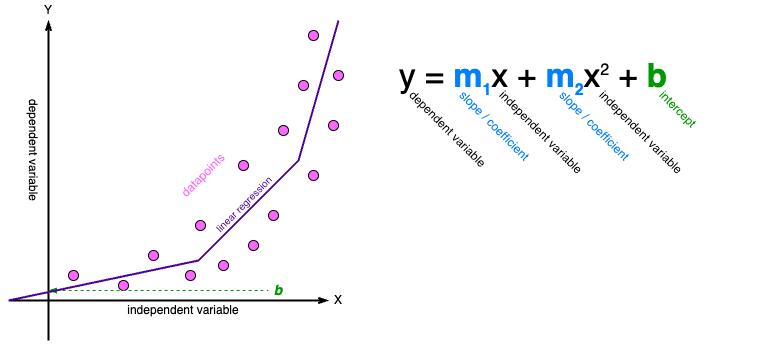

## Problem Statement

### 1.Predict House Price based on given House Area & Age

| House Area | House Age | House Price |
| :--------: | :-------: | :---------: |
|   sq.ft.   |     yr    |      $      |
|   2600.0   |     20    |  550000.00  |
|   3000.0   |     15    |  565000.00  |
|   3200.0   |     18    |  610000.00  |
|   3600.0   |     30    |  680000.00  |
|   4000.0   |     08    |  725000.00  |
|   4100.0   |     08    |  810000.00  |
Given above data build a machine learning model that can predict home prices based on given area in sq.ft & age in years.

In [ ]:
!pip install -r requirements.txt

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
data = {
    'area': [2600, 3000, 3200, 3600, 4000, 4100],
    'age': [20, 15, 18, 30, 8, 8],
    'price': [550000, 565000, 610000, 680000, 725000, 810000]
}
test = {
    'area': [2000, 3300, 4400],
    'age': [10, 13, 16]
}

In [6]:
df = pd.DataFrame(data)
df

,area,age,price
0,2600,20,550000
1,3000,15,565000
2,3200,18,610000
3,3600,30,680000
4,4000,8,725000
5,4100,8,810000


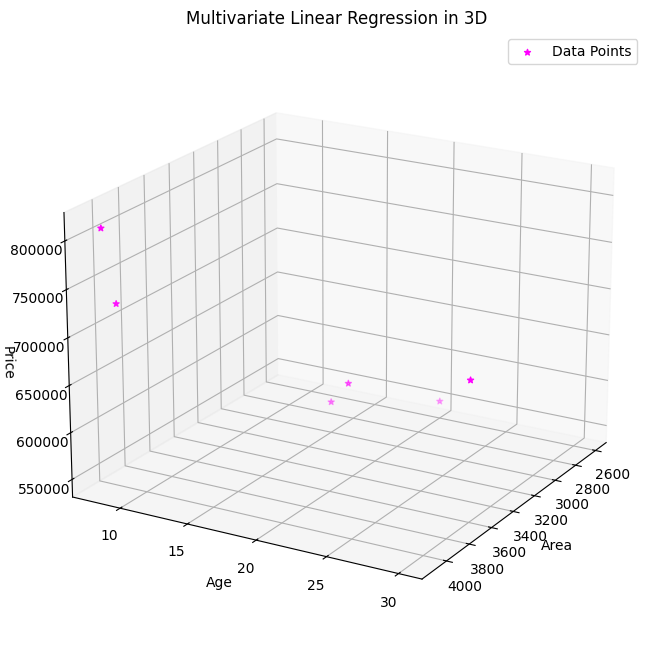

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.area, df.age, df.price, color='magenta',marker='*', label='Data Points')
ax.set_xlabel('Area')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('Multivariate Linear Regression in 3D')
ax.view_init(elev=20, azim=30)
ax.legend()

In [8]:
new_df = df.drop(['price'],axis='columns')
new_df

,area,age
0,2600,20
1,3000,15
2,3200,18
3,3600,30
4,4000,8
5,4100,8


In [12]:
reg = linear_model.LinearRegression()
reg.fit(new_df, df.price)

LinearRegression()

In [13]:
tst = pd.DataFrame(test)
tst

,area,age
0,2000,10
1,3300,13
2,4400,16


In [14]:
p=reg.predict(tst)
p

array([428639.22388436, 638857.20438692, 816583.06370283])

In [15]:
tst['prices']=p
tst

,area,age,prices
0,2000,10,428639.223884
1,3300,13,638857.204387
2,4400,16,816583.063703


In [16]:
m = reg.coef_
m

array([ 162.46060593, -326.9357369 ])

In [17]:
b = reg.intercept_
b

106987.36938678322

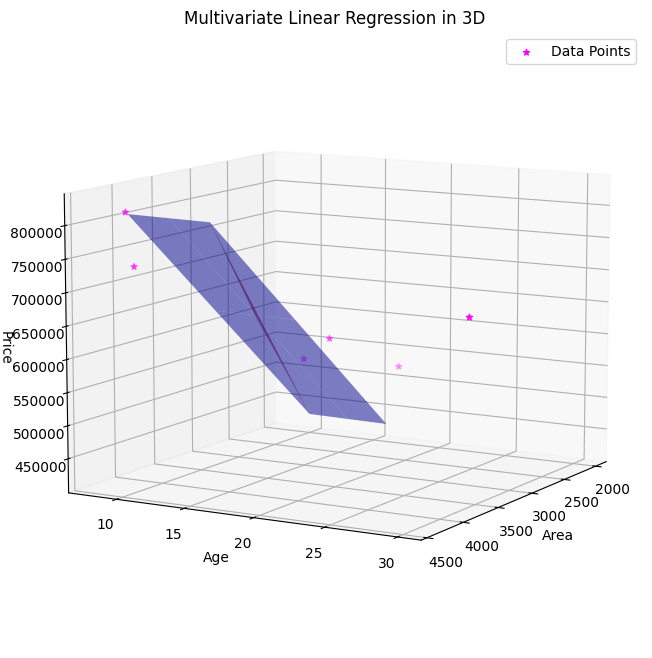

In [41]:
X1, X2 = np.meshgrid(tst.area, tst.age)
mesh_df = pd.DataFrame({'area': X1.ravel(), 'age': X2.ravel()})
Z = reg.predict(mesh_df).reshape(X1.shape)

%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.area, df.age, df.price, color='magenta',marker='*', label='Data Points')
ax.set_xlabel('Area')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('Multivariate Linear Regression in 3D')
ax.view_init(elev=10, azim=30)
ax.legend()
ax.plot_trisurf(tst.area, tst.age, tst.prices, color='red', alpha=0.5, label='Predicted')
ax.plot_surface(area, age, Z, color='blue', alpha=0.5, label='Predicted')